In [137]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from c_PatchDataset import PatchDataset
import matplotlib.pyplot as plt
import os
import numpy as np

In [138]:
batch_size = 32

data_dir = 'C:/Users/david/MT_code/data/extracted_patches/mutants_tensors'
labels_file = 'C:/Users/david/MT_code/data/fitness_dict_1500.npy'

In [139]:
data_transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.ConvertImageDtype(torch.double)])

#label_transforms = transforms.Compose(
#    [transforms.ToTensor(),
#     transforms.ConvertImageDtype(torch.double)])

In [140]:
dataset = PatchDataset(labels_file = labels_file, data_dir = data_dir, 
                        transform = data_transforms)#, target_transform=label_transforms)

In [141]:
trainset, testset = torch.utils.data.random_split(dataset, [1200, 300])

In [142]:
trainloader = DataLoader(dataset = trainset, batch_size= batch_size, shuffle = True)
testloader = DataLoader(dataset = testset, batch_size= batch_size, shuffle = True)

In [143]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=(1,1))    #image becomes (72*10*8)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)                       #image becomes (36*5*8) 
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=4, kernel_size=(5,2))     #image becomes (32*4*4)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)                       #image becomes (16*2*4)                                   
        self.fc1 = nn.Linear(16 * 2 * 4, 64)                                        
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = ConvNet()
model.double()

ConvNet(
  (conv1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 4, kernel_size=(5, 2), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)

In [144]:
num_epochs = 100
learning_rate = 0.001

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)#, momentum=0.9)

### Training the model: 

epoch 1, loss 3.279598
epoch 1, loss 2.568395
epoch 1, loss 1.349291
epoch 1, loss 5.535667
epoch 1, loss 2.328800
epoch 1, loss 3.266725
epoch 1, loss 5.869539
epoch 1, loss 2.627608
epoch 1, loss 2.485588
epoch 1, loss 4.137714
epoch 1, loss 3.277653
epoch 1, loss 3.479013
epoch 1, loss 1.445634
epoch 1, loss 2.914383
epoch 1, loss 4.543688
epoch 1, loss 2.344186
epoch 1, loss 3.070786
epoch 1, loss 2.088214
epoch 1, loss 4.526656
epoch 1, loss 4.780688
epoch 1, loss 4.062542
epoch 1, loss 2.450808
epoch 1, loss 2.285813
epoch 1, loss 2.146358
epoch 1, loss 3.036650
epoch 1, loss 1.494964
epoch 1, loss 4.336636
epoch 1, loss 3.208999
epoch 1, loss 3.057554
epoch 1, loss 2.541337
epoch 1, loss 1.994244
epoch 1, loss 4.452659
epoch 1, loss 1.301547
epoch 1, loss 3.663413
epoch 1, loss 4.106795
epoch 1, loss 3.206397
epoch 1, loss 2.647650
epoch 1, loss 1.553733
epoch 2, loss 2.514451
epoch 2, loss 2.208987
epoch 2, loss 2.544325
epoch 2, loss 4.740436
epoch 2, loss 2.940237
epoch 2, lo

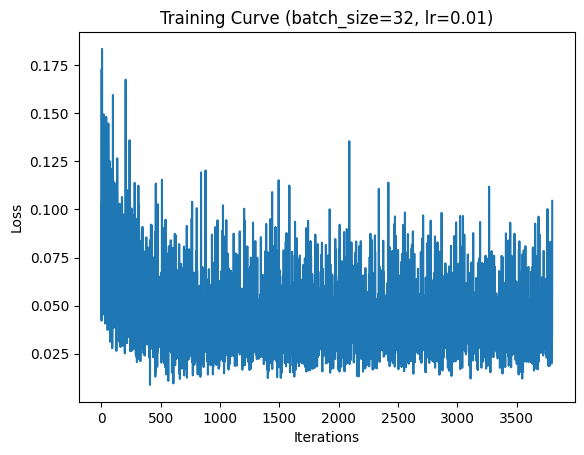

In [145]:
iters, losses = [], []

n=0
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)

        #print(outputs.shape)
        #print(labels.shape)
        outputs = outputs.view(len(inputs))
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        print(f'epoch {epoch + 1}, loss {loss:f}')
        iters.append(n)
        losses.append(float(loss)/batch_size) # compute *average* loss
        n +=1

print('Finished Training')

# plotting
plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate)) 
plt.plot(iters, losses, label="Train")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [146]:
#PATH = './cifar_net.pth'
#torch.save(net.state_dict(), PATH)